# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

%matplotlib inline

In [2]:
# Read the Mapbox API key
load_dotenv('example.env')
map_box_api = os.getenv("mapbox")
#print(map_box_api)

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()
to_data.tail()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122
2016,Yorkdale-Glen Park,2165,1185,0,80,600,465,830,5,599698,1451,1128


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [5]:
# Calculates mean number of dwelling types units per year (hint: use groupby)
NewDF1=to_data[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']].groupby(by='year').mean()
NewDF2=to_data[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']].groupby(by='year').sum()
NewDF2.head()
#Error in question posted to SLACK channel JUl 10.Amar Munipalle  8:23 AM Starting PyViz HW. @Steven Hope - Instructor the question 1 in rental analysis does not match output. The question is Calculates mean number of dwelling types units per year (hint: use groupby). The output is not mean but SUM

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [5]:
# Saved dataframe as a csv file
NewDF2.to_csv("DwellingTypesByYear.csv")

In [7]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
   
    #ax=plt.bar(data, align='center', alpha=0.5,color=color)
    ax=data.plot.bar(title=title,color=color[0])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    return

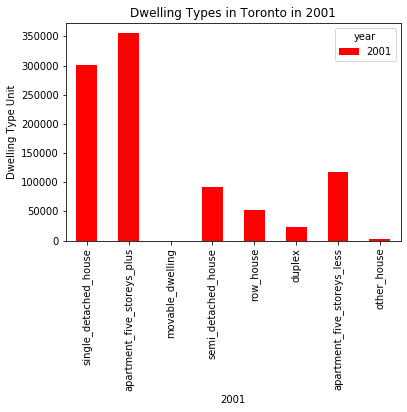

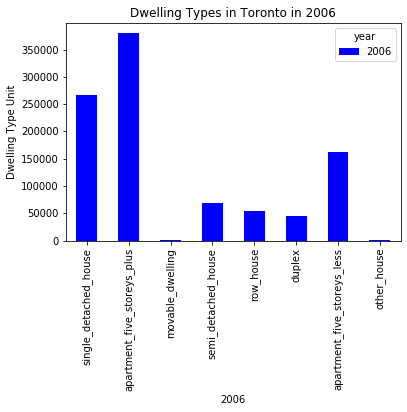

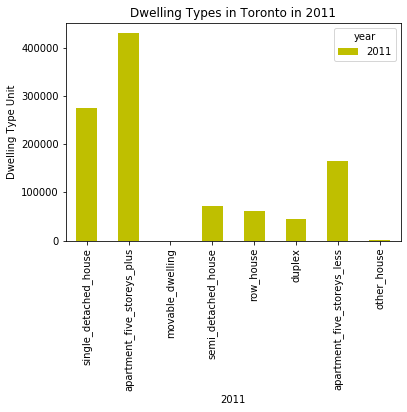

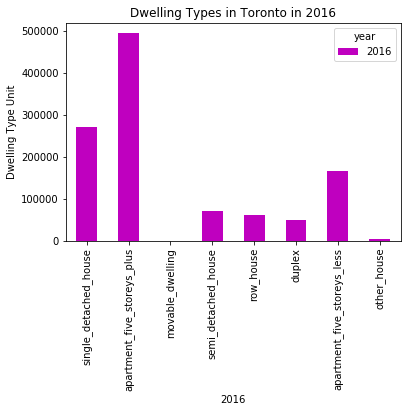

In [8]:
# Create a bar chart per year to show the number of dwelling types
title_base="Dwelling Types in Toronto in "
ylabel1="Dwelling Type Unit"

# Bar chart for 2001
xlabel1=str(2001)
DF_2001=NewDF2.loc[NewDF2.index==2001].T
DF_2001.head()
title1=title_base+xlabel1
create_bar_chart(DF_2001,title1,xlabel1,ylabel1,'red')

# Bar chart for 2006
xlabel1=str(2006)
DF_2006=NewDF2.loc[NewDF2.index==2006].T
title1=title_base+xlabel1
create_bar_chart(DF_2006,title1,xlabel1,ylabel1,'blue')
# Bar chart for 2011
xlabel1=str(2011)
DF_2011=NewDF2.loc[NewDF2.index==2011].T
title1=title_base+xlabel1
create_bar_chart(DF_2011,title1,xlabel1,ylabel1,'yellow')

# Bar chart for 2016
xlabel1=str(2016)
DF_2016=NewDF2.loc[NewDF2.index==2016].T
title1=title_base+xlabel1
create_bar_chart(DF_2016,title1,xlabel1,ylabel1,'magenta')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [10]:
# Calculate the average monthly shelter costs for owned and rented dwellings
NewDF3=to_data[['shelter_costs_owned','shelter_costs_rented']].groupby(by='year').mean()
NewDF3.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [11]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    ax=data.plot.line(title=title,color=color[0])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    return

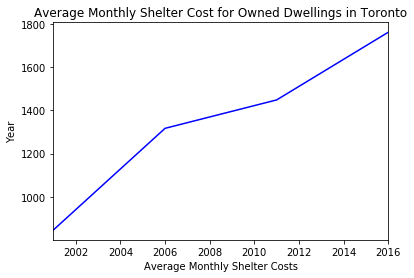

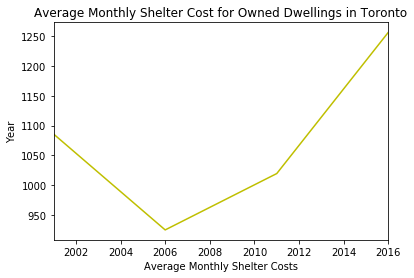

In [12]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings

title="Average Monthly Shelter Cost for Owned Dwellings in Toronto"
xlabel="Average Monthly Shelter Costs"
ylabel="Year"
create_line_chart(NewDF3['shelter_costs_owned'], title, xlabel, ylabel,'blue')

# Line chart for rented dwellings

create_line_chart(NewDF3['shelter_costs_rented'], title, xlabel, ylabel,'yellow')

## Average House Value per Year

In [13]:
# Calculate the average house value per
NewDF4=to_data['average_house_value'].groupby(by='year').mean()
NewDF4

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

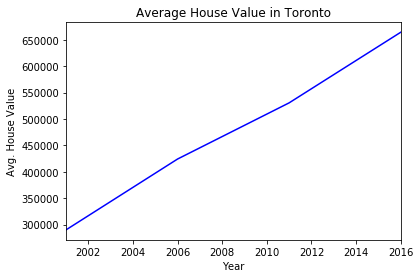

In [14]:
# Plot the average house value per year as a line chart
ax=NewDF4.plot.line(title="Average House Value in Toronto",color='b')
ax.set_xlabel("Year")
ax.set_ylabel("Avg. House Value")
plt.show()

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [15]:
# Create a new DataFrame with the mean house values by neighbourhood per year
NewDF5=to_data[['neighbourhood','average_house_value']].groupby(['year','neighbourhood']).mean().reset_index()
NewDF5.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [21]:
# hvplot interactive line chart of average house value per with drop down selector as neighbourhood
NewDF5.hvplot.line(x='year',y='average_house_value',groupby='neighbourhood',value_label='Average House by Neighborhood').opts(framewise=True,yformatter='$%.2f')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

As HVPlot automatically recalibrates y-axis causing a seemingly stationary trend line; limits are set on y-axis to permit a more visual effect

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [22]:
# Fetch the data of all dwelling types per year. Calculated Average and Sum (of dwellings) as seperate DF columns

NewDF6=to_data.reset_index()

NewDF7=NewDF6.iloc[:,:10]
NewDF7['average dwelling']=NewDF7.iloc[:,2:10].mean(axis=1)
NewDF7['number of dewellings']=NewDF7.iloc[:,2:10].sum(axis=1)
#NewDF7.iloc[:,2:10].head()
NewDF7.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average dwelling,number of dewellings
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,991.250,7930
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,826.875,6615
2,2001,Alderwood,3175,315,0,470,50,185,370,0,570.625,4565
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,1736.250,13890
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,1259.375,10075


In [23]:
#Facet graph with Neighbourhood dropdown. Used facet property after applying groupby to pull the requisite columns
import numpy as np
NewDF7.head()
NewDF8=NewDF7.drop(['average dwelling','number of dewellings'],axis=1)
NewDF8.groupby(['year','neighbourhood','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']).sum().hvplot.bar(stacked=False,groupby='neighbourhood',height=500,rot=90)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [25]:
# Getting the data from the top 10 expensive neighbourhoods. This is constructed across all years. 

Top10Neighborhood=to_data.groupby(['neighbourhood']).mean().sort_values(by=['average_house_value'],ascending=False).head(10)
Top10Neighborhood

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [26]:
# Plotting the data from the top 10 expensive neighbourhoods using hvplot
Top10Neighborhood.hvplot.bar(y='average_house_value',height=500,rot=90)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [34]:
# Facet bar chart using plotly express
import plotly.express as px
BarFacetDF=to_data[['neighbourhood','average_house_value']].reset_index()

fig = px.bar(BarFacetDF,x='neighbourhood', y="average_house_value", color="average_house_value",facet_row="year")
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()



### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [35]:
# Fetch the data from all expensive neighbourhoods per year.
ExpensiveDF_subset=to_data[['neighbourhood','average_house_value']]
df_agg = to_data.groupby(['year','neighbourhood','shelter_costs_owned','shelter_costs_rented']).agg({'average_house_value':sum})
ctestdf=g.nlargest(10)

idx=testdf.index

idx.get_level_values(2)
data = {'neighbourhood':idx.get_level_values(1), 'shelter_costs_owned':idx.get_level_values(2),'shelter_costs_rented':idx.get_level_values(3),'average_home_value':testdf.values} 
ExpensiveDF=pd.DataFrame(data=data,index=idx.get_level_values(0))
ExpensiveDF.head()

,neighbourhood,shelter_costs_owned,shelter_costs_rented,average_home_value
year,,,,
2001,Bridle Path-Sunnybrook-York Mills,1983,1790,927466
2001,Forest Hill South,1001,1469,726664
2001,Lawrence Park South,1021,1630,664712
2001,Rosedale-Moore Park,1219,1540,664476
2001,St.Andrew-Windfields,1055,1551,607040


In [50]:
g = df_agg['average_house_value'].groupby(level=0, group_keys=False)



In [47]:
idx.get_level_values


<bound method MultiIndex.get_level_values of MultiIndex(levels=[[2001, 2006, 2011, 2016], ['Bedford Park-Nortown', 'Bridle Path-Sunnybrook-York Mills', 'Casa Loma', 'Forest Hill North', 'Forest Hill South', 'Kingsway South', 'Lawrence Park South', 'Rosedale-Moore Park', 'St.Andrew-Windfields', 'Yonge-St.Clair'], [933, 940, 1001, 1021, 1055, 1091, 1219, 1241, 1362, 1625, 1638, 1731, 1781, 1787, 1802, 1808, 1819, 1868, 1881, 1904, 1959, 1977, 1983, 1988, 2001, 2054, 2069, 2170, 2173, 2174, 2192, 2316, 2383, 2387, 2418, 2434, 2498, 2516, 2644, 2903], [1020, 1027, 1094, 1116, 1124, 1132, 1152, 1192, 1206, 1230, 1270, 1314, 1332, 1340, 1351, 1356, 1385, 1395, 1428, 1468, 1469, 1486, 1488, 1491, 1494, 1500, 1515, 1540, 1551, 1565, 1619, 1630, 1640, 1790, 1809, 1841, 2020, 2167, 2388, 2942]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 4, 6, 7, 8, 2, 0, 3, 5, 9, 1, 4, 6, 7, 8, 2, 0, 3, 5, 9, 1,

In [36]:
# Create the sunburst chart
import plotly.express as px
import numpy as np
ExpensiveDF=ExpensiveDF.reset_index()
fig = px.sunburst(ExpensiveDF, path=['year','neighbourhood'], values='average_home_value',
                  color='shelter_costs_owned', hover_data=['shelter_costs_owned','shelter_costs_rented'],
                  color_continuous_scale='ice'
                  )
fig.show()

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [51]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [52]:
# Calculate the mean values for each neighborhood

MeanValuesNeighbourhood=to_data.groupby(by='neighbourhood').mean().reset_index()
MeanValuesNeighbourhood.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [24]:
# Join the average values with the neighbourhood locations
#JoinedDF=pd.concat([df_neighbourhood_locations,MeanValuesNeighbourhood],axis=1,join="inner")
JoinedDF=df_neighbourhood_locations.merge(MeanValuesNeighbourhood, on="neighbourhood", how = 'inner')
JoinedDF.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

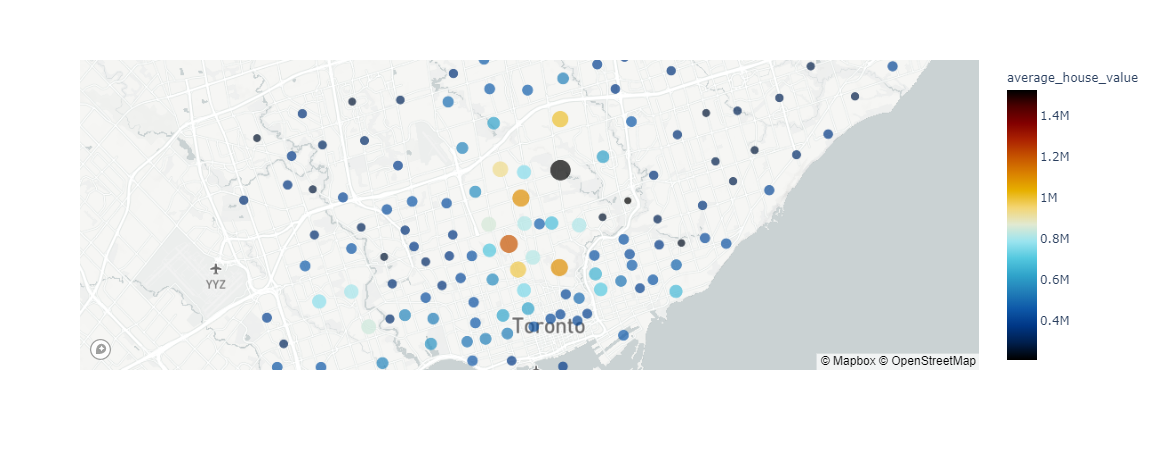

In [25]:
# Create a scatter mapbox to analyze neighbourhood info
import plotly.express as px
from dotenv import load_dotenv
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

fig = px.scatter_mapbox(JoinedDF, lat="lat", lon="lon",color="average_house_value", size="average_house_value",hover_name='neighbourhood',
                        hover_data=['shelter_costs_owned', 'shelter_costs_rented','single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling',
       'semi_detached_house', 'row_house', 'duplex','apartment_five_storeys_less', 'other_house','lat', 'lon'],
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()